### Instructions

#### Goal of the Project

This project is designed for you to practice and solve the activities that are based on the concepts covered in the following lessons:

 1. Logistic Regression - Univariate Classification I

 2. Logistic Regression - Decision Boundary

 3. Logistic Regression - Multiclass Classification I




---

#### Getting Started:

1. Click on this link to open the Colab file for this project.

     https://colab.research.google.com/drive/1UvGgfNYlK8p2fE1umQNl2hEeTH3hx2_X

2. Create a duplicate copy of the Colab file as described below.

  - Click on the **File menu**. A new drop-down list will appear.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/0_file_menu.png' width=500>

  - Click on the **Save a copy in Drive** option. A duplicate copy will get created. It will open up in the new tab on your web browser.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/lesson-0/1_create_colab_duplicate_copy.png' width=500>

3. After creating the duplicate copy of the notebook, please rename it in the **YYYY-MM-DD_StudentName_Project80** format.

4. Now, write your code in the prescribed code cells.


---

### Problem Statement

In this project, you are going to create your own synthetic data for multiclass classification and create a Logistic Regression model to classify the data using Machine Learning.


---

### List of Activities

**Activity 1:** Create the Dummy Dataset

**Activity 2:**  Dataset Inspection

**Activity 3:**  Train-Test Split

**Activity 4:** Logistic Regression - Model Training

**Activity 5:** Model Prediction and Evaluation - Training Set

**Activity 6:** Model Prediction and Evaluation - Testing Set


---

#### Activity 1: Create Dummy Dataset

In this activity, you have to create a dummy dataset for multiclass classification.

The steps to be followed are as follows:

**1.** Create a dummy dataset having two columns representing two independent variables and a third column representing the target.  

  The number of records should be divided into 6 random groups like `[200, 4270, 7930, 21, 3331, 2721]` such that the target columns has 6 different labels `[0, 1, 2, 3, 4, 5]`.


  **Recall:**

  To create a dummy data-frame, use the `make_blob()` function of the `sklearn.datasets` module which will return two arrays `feature_array` and the `target_array`. The syntax for the `make_blob()` function is as follows:

  **Syntax:** `make_blobs(n_samples, centers, n_features, random_state, cluster_std)`



In [ ]:
# Create two arrays using the 'make_blobs()' function and store them in the 'features_array' and 'target_array' variables.
from sklearn.datasets import make_blobs
features_array ,target_array =  make_blobs(n_samples = [200, 4270, 7930,21,3331,2721],centers = None,n_features = 2,random_state = 42, cluster_std = 1.25)

**Hint:**

In the `make_blobs()` function use `n_samples=[200, 4270, 7930,21,3331,2721]` and `center=None` for the division of target label into seven groups.

----
**2.** Print the object-type of the arrays created by the `make_blob()` function and also print the number of rows and columns in them.

In [ ]:
# Find out the object-type of the arrays created by the 'make_blob()' function and the number of rows and columns in them.
# Print the type of 'features_array' and 'target_array'

print(f"target array type : {type(target_array)}")
print(f"features array type : {type(features_array)}")

# Print the number of rows and column of 'features_array'
print(f"features array shape : {features_array.shape}")

# Print the number of rows and column of 'target_array'
print(f"target array shape : {target_array.shape}")

target array type : <class 'numpy.ndarray'>
features array type : <class 'numpy.ndarray'>
features array shape : (18473, 2)
target array shape : (18473,)


**Q:** How many rows are created in the feature and target columns?

**A:** No. of rows created in feature and target columns =`1843`.

----
**3.** Create a DataFrame from the two arrays using a Python dictionary.

**Steps: (Learnt in "Logistic Regression - Decision Boundary" lesson**)
- Create a dummy dicitonary.

- Add the feature columns as keys `col 1`, `col 2` and target column as `target`.

- Add the values from the feature and target columns one by one respectively in the dictionary using List Comprehension.

- Convert the dictionary into a DataFrame

- Print first five rows of the DataFrame.

In [ ]:
# Create a Pandas DataFrame containing the items from the 'features_array' and 'target_array' arrays.

# Import the module
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import pandas as pd
# Create a dummy dictionary
dummy_dict = {'col 1':[features_array[i][0] for i in range(features_array.shape[0])],
              'col 2':[features_array[i][1] for i in range(features_array.shape[0])],
              'target':target_array}

# Convert the dictionary into DataFrame
dummy_df = pd.DataFrame.from_dict(dummy_dict)
# Print first five rows of the DataFrame
print(dummy_df.head(5))

      col 1      col 2  target
0 -1.061559  10.003864       0
1 -7.385776  -6.231196       2
2 -7.373461  -6.975344       2
3 -4.190672  -4.622257       2
4 -5.720065  -6.732613       2


**Hint:**

Use function `from_dict()` to convert Python Dictionary to DataFrame.

**Syntax:** `pd.DataFrame.from_dict(some_dictionary)`

**After this activity, the DataFrame should be created with two independent features columns and one dependent target column.**

----

#### Activity 2: Dataset Inspection

In this activity, you have look into the distribution of the labels in the `target` column of the DataFrame.

**1.** Print the number of occurences of each label in `target` column.

In [ ]:
# Display the number of occurrences of each label in the 'target' column.
dummy_df['target'].value_counts()

2    7930
1    4270
4    3331
5    2721
0     200
3      21
Name: target, dtype: int64

**2.** Print the percentage of the samples for each label in `target` column.

In [ ]:
# Get the percentage of count of each label samples in the dataset.
percent = dummy_df['target'].value_counts(normalize = True)
print(round(percent,2))

2    0.43
1    0.23
4    0.18
5    0.15
0    0.01
3    0.00
Name: target, dtype: float64


In [ ]:
dummy_df['target'].unique()

array([0, 2, 1, 4, 5, 3])

**Q:** How many unique labels are present in the DataFrame? What are they?

**A:** 5

**Q:** Is the DataFrame balanced?

**A:** No

---



**3.**  Create a scatter plot between the columns `col 1` and `col 2` for all the labels to visualize the clusters of every class (or points).

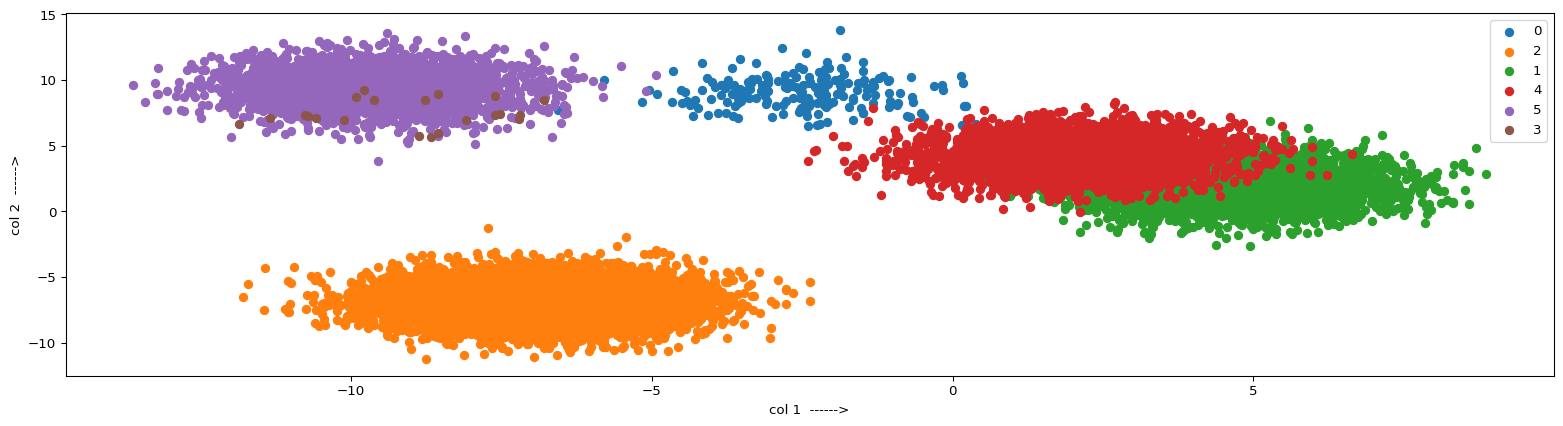

In [ ]:
# Create a scatter plot between 'col 1' and 'col 2' columns separately for all the classes in the same plot.
# Import the module
import seaborn as sns
import matplotlib.pyplot as plt

# Define the size of the graph
plt.figure(figsize=(20,5),dpi = 96)

# Create a for loop executing for every unique class in `target` column.
for i in dummy_df['target'].unique():
  # Plot the scatter plot for 'col 1' and 'col 2' where 'target ==i"
   plt.scatter(dummy_df.loc[dummy_df['target']== i,'col 1'],dummy_df.loc[dummy_df['target']==i,'col 2' ],label = i)

# Plot the x and y lables
plt.xlabel('col 1  ------>')
plt.ylabel('col 2  ------>')
# Display the legends and the graph
plt.legend()
plt.show()

**Hint:**
Revise the lesson "Logistic Regression - Decision Boundary".

**After this activity, the labels to be predicted i.e the target variables and their distribution should be known.**

----

#### Activity 3: Train-Test Split

We need to predict the value of the `target` variable, using other variables. Thus, `target` is the dependent variable and other columns are the independent variables.

**1.** Split the dataset into the training set and test set such that the training set contains 70% of the instances and the remaining instances will become the test set.

**2.** Set `random_state = 42`.

In [ ]:
# Import 'train_test_split' module
from sklearn.model_selection import train_test_split

# Create the features data frame holding all the columns except the last column
# and print first five rows of this dataframe
X = dummy_df.iloc[:,:-1]
print("features data\n", X.head())
print('----'*5)

# Create the target series that holds last column 'target'
# and print first five rows of this series
y = dummy_df['target']
print("target series\n", y.head())

# Split the train and test sets using the 'train_test_split()' function.
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.33,random_state=42)

features data
       col 1      col 2
0 -1.061559  10.003864
1 -7.385776  -6.231196
2 -7.373461  -6.975344
3 -4.190672  -4.622257
4 -5.720065  -6.732613
--------------------
target series
 0    0
1    2
2    2
3    2
4    2
Name: target, dtype: int64


**3.** Print the number of rows and columns in the training and testing set.

In [ ]:
# Print the shape of all the four variables i.e. 'x_train', 'x_test', 'y_train' and 'y_test'
print(f"X_train shape : {X_train.shape}")
print(f"X_test shape : {X_test.shape}")
print("-------"*5)
print(f"y_train shape : {y_train.shape}")
print(f"y_test shape : {y_test.shape}")

X_train shape : (6096, 2)
X_test shape : (12377, 2)
-----------------------------------
y_train shape : (6096,)
y_test shape : (12377,)


**After this activity, the features and target data should be splitted into training and testing data.**

----

#### Activity 4: Logistic Regression - Model Training

Implement Logistic Regression Classification using `sklearn` module in the following way:

1. Deploy the model by importing the `LogisticRegression` class and create an object of this class.
2. Call the `fit()` function on the Logistic Regression object and print the score using the `score()` function.


In [ ]:
# Build a logistic regression model using the 'sklearn' module.
from sklearn.linear_model import LogisticRegression


# 1. Create the Logistic Regression object
log_clf = LogisticRegression()
# 2. Call the 'fit()' function with training set as inputs.
log_clf.fit(X_train,y_train)

# 3. Call the 'score()' function with training set as inputs to check the accuracy score of the model.
log_clf.score(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.9655511811023622

**Note:** Ignore the warnings if any for now.

**After this activity, a Logistic Regression model object should be trained for multiclass classification.**

----

#### Activity 5: Model Prediction and Evaluation - Training Set

**1.** Predict the values for training set by calling the `predict()` function on the Logistic Regression object.

**2.** Print the unique labels predicted using Logistic Regression on training features.

**3.** Print the distribution of the labels predicted in the predicted target series for the training features.


In [ ]:
# Predict the values of 'target' by the logistic regression model on the train set.
# Predict the target for the training features data
y_train_pred = log_clf.predict(X_train)

# Convert the predicted array into series
y_train_pred = pd.Series(y_train_pred)

# Print the unique labels in the predicted series for training features
print(f"unique labels in the predicted series :{y_train_pred.unique()}")

# Print the distribution labels in the predicted series for training features
print(f"Distribution labels in the predicted series :{y_train_pred.value_counts()}")

unique labels in the predicted series :[4 5 1 2 0]
Distribution labels in the predicted series :2    2602
1    1408
4    1130
5     892
0      64
dtype: int64


**Q:** Are all the label values predicted for the training features data?

**A:** No

$$ $$
**Q:** Which labels are predicted and not predicted by the Logistic Regression model?

**A:** Labels 1,2,4,5,0 have been predicted and label 3 is not been predicted.

**After this activity, values of the labels should be predicted for the target columns using training features set and the model should be evaluated for the same.**

----

#### Activity 6: Model Prediction and Evaluation - Test Set

**1.** Predict the values for the test set by calling the `predict()` function on the Logistic Regression object.

**2.** Print the unique labels predicted using Logistic Regression on test features.

**3.** Print the distribution of the labels predicted in the predicted target series for the test features.


In [ ]:
# Predict the values of 'target' by the logistic regression model on the test set.
# Predict the target for the test features data
y_test_pred = log_clf.predict(X_test)

# Convert the predicted array into series
y_test_pred = pd.Series(y_test_pred)

# Print the unique labels in the predicted series for test features
print(f"Unique labels in the predicted Series :{y_test_pred.unique()}")

# Print the distribution labels in the predicted series for test features
print(f"Distribution labels in the predicted Series :{y_test_pred.value_counts()}")

Unique labels in the predicted Series :[1 5 2 4 0]
Distribution labels in the predicted Series :2    5329
1    2816
4    2248
5    1849
0     135
dtype: int64


**Q:** Are all the labels predicted for the test features data?

**A:** No

$$ $$
**Q:** What are labels predicted and not predicted using Logistic Regression model object?

**A:** Labels 1,2,4,5,0 have been predicted and label 3 is not been been predicted.

---
**4.** Display the confusion matrix for the test set:


In [ ]:
# Print the confusion matrix for the actual and predicted data of the test set (if required)
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix(y_test,y_test_pred)

array([[ 131,    0,    0,    0,    3,    1],
       [   0, 2613,    0,    0,  251,    0],
       [   0,    0, 5328,    0,    0,    0],
       [   0,    0,    0,    0,    0,   16],
       [   2,  203,    0,    0, 1994,    0],
       [   2,    0,    1,    0,    0, 1832]])

**5.** Display the classification report for the test set:

In [ ]:
# Print the classification report for the actual and predicted data of the testing set (if required)
print(f"Classification Report :{classification_report(y_test,y_test_pred)}")

Classification Report :              precision    recall  f1-score   support

           0       0.97      0.97      0.97       135
           1       0.93      0.91      0.92      2864
           2       1.00      1.00      1.00      5328
           3       0.00      0.00      0.00        16
           4       0.89      0.91      0.90      2199
           5       0.99      1.00      0.99      1835

    accuracy                           0.96     12377
   macro avg       0.80      0.80      0.80     12377
weighted avg       0.96      0.96      0.96     12377



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**After this activity, labels should be predicted for the target columns using test features set and the model should be evaluated for the same.**

---

**Write your interpretation of the results here.**

- Interpretation 1:
- Interpretation 2:
- Interpretation 3:

---

### Submitting the Project:

1. After finishing the project, click on the **Share** button on the top right corner of the notebook. A new dialog box will appear.

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/2_share_button.png' width=500>

2. In the dialog box, make sure that '**Anyone on the Internet with this link can view**' option is selected and then click on the **Copy link** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/3_copy_link.png' width=500>

3. The link of the duplicate copy (named as **YYYY-MM-DD_StudentName_Project80**) of the notebook will get copied

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/4_copy_link_confirmation.png' width=500>

4. Go to your dashboard and click on the **My Projects** option.
   
   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/5_student_dashboard.png' width=800>

  <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/6_my_projects.png' width=800>

5. Click on the **View Project** button for the project you want to submit.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/7_view_project.png' width=800>

6. Click on the **Submit Project Here** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/8_submit_project.png' width=800>

7. Paste the link to the project file named as **YYYY-MM-DD_StudentName_Project80** in the URL box and then click on the **Submit** button.

   <img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/project-share-images/9_enter_project_url.png' width=800>